Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of
the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: 
"Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].
    

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/
    

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28
Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) 
perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity 
(severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) 
fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each
image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant



In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
df=pd.read_csv("breast cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [25]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [135]:
df.replace({'M':0,'B':1},inplace=True)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


                        diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                1.000000    -0.730029     -0.415185       -0.742636   
radius_mean             -0.730029     1.000000      0.323782        0.997855   
texture_mean            -0.415185     0.323782      1.000000        0.329533   
perimeter_mean          -0.742636     0.997855      0.329533        1.000000   
area_mean               -0.708984     0.987357      0.321086        0.986507   
smoothness_mean         -0.358560     0.170581     -0.023389        0.207278   
compactness_mean        -0.596534     0.506124      0.236702        0.556936   
concavity_mean          -0.696360     0.676764      0.302418        0.716136   
concave points_mean     -0.776614     0.822529      0.293464        0.850977   
symmetry_mean           -0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean   0.012838    -0.311631     -0.076437       -0.261477   

                        area_mean  smoo

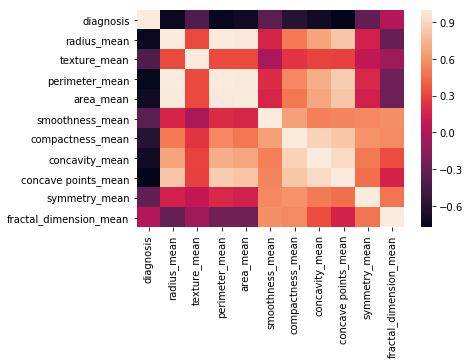

In [85]:
X1=df.iloc[:,1:12]
H1=sns.heatmap(X1.corr())
print(X1.corr())               #Considering features whose correlation with the output is above 50% 
  #                            radius_mean,perimeter_mean, area_mean, compactness_mean,concativity_mean,concave points_mean
                             
                                                                                  

                        diagnosis  symmetry_mean  fractal_dimension_mean  \
diagnosis                1.000000      -0.330499                0.012838   
symmetry_mean           -0.330499       1.000000                0.479921   
fractal_dimension_mean   0.012838       0.479921                1.000000   
radius_se               -0.567134       0.303379                0.000111   
texture_se               0.008303       0.128053                0.164174   
perimeter_se            -0.556141       0.313893                0.039830   
area_se                 -0.548236       0.223970               -0.090170   
smoothness_se            0.067016       0.187321                0.401964   
compactness_se          -0.292999       0.421659                0.559837   
concavity_se            -0.253730       0.342627                0.446630   

                        radius_se  texture_se  perimeter_se   area_se  \
diagnosis               -0.567134    0.008303     -0.556141 -0.548236   
symmetry_mean    

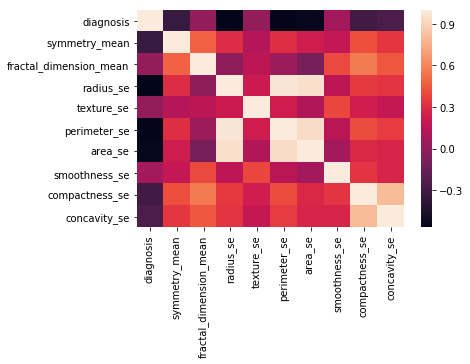

In [86]:
X2=df.iloc[:,[1,10,11,12,13,14,15,16,17,18]]
H2=sns.heatmap(X2.corr())
print(X2.corr())                              # Considering features whose correlation with the output is above 50%
                      #                     radius_se,perimeter_se,area_se,

                         diagnosis  concave points_se  symmetry_se  \
diagnosis                 1.000000          -0.408042     0.006522   
concave points_se        -0.408042           1.000000     0.312780   
symmetry_se               0.006522           0.312780     1.000000   
fractal_dimension_se     -0.077972           0.611044     0.369078   
radius_worst             -0.776454           0.358127    -0.128121   
texture_worst            -0.456903           0.086741    -0.077473   
perimeter_worst          -0.782914           0.394999    -0.103753   
area_worst               -0.733825           0.342271    -0.110343   
smoothness_worst         -0.421465           0.215351    -0.012662   
compactness_worst        -0.590998           0.452888     0.060255   
concavity_worst          -0.659610           0.549592     0.037119   
concave points_worst     -0.793566           0.602450    -0.030413   
symmetry_worst           -0.416294           0.143116     0.389402   
fractal_dimension_wo

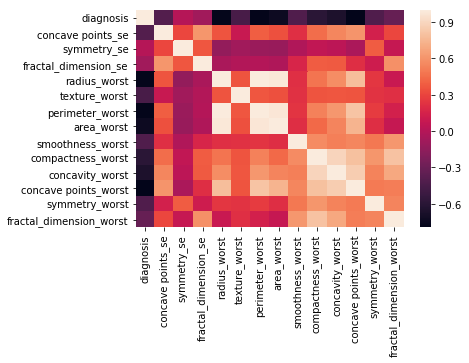

In [87]:
X3=df.iloc[:,[1,19,20,21,22,23,24,25,26,27,28,29,30,31]]
H3=sns.heatmap(X3.corr())
print(X3.corr())
# Considering features whose correlation with the output is above 50%
#radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst      

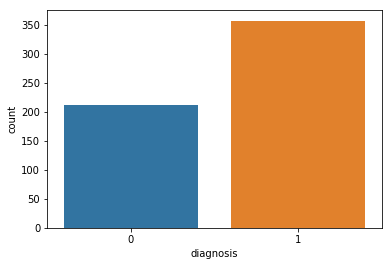

In [65]:
sns.countplot(df['diagnosis'])  # 0--> M ,1--> B

In [136]:
X=df.drop(['Unnamed: 32','diagnosis','id'],axis=1)
y=df['diagnosis']

# Considering Every Feature

f1_score_test: 0.949640287769784
f1_score_train: 0.9692832764505119


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


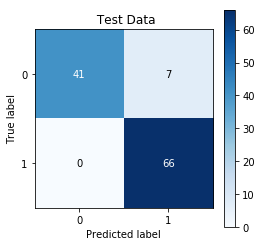

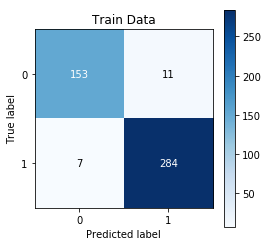

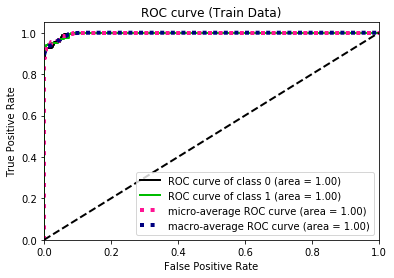

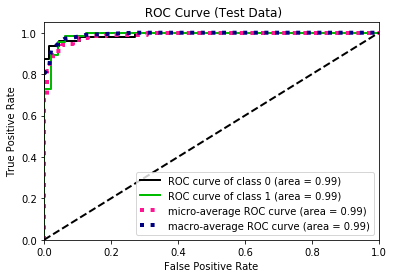

In [81]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12)
lg=LogisticRegression()
lg.fit(X_train,y_train)
y_pred_test=lg.predict(X_test)
y_pred_train=lg.predict(X_train)
y_prob_train=lg.predict_proba(X_train)
y_prob_test=lg.predict_proba(X_test)
print("f1_score_test: "+str(f1_score(y_test,y_pred_test)))
print("f1_score_train: "+str(f1_score(y_train,y_pred_train)))
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,y_pred_test,figsize=(4,4),title=" Test Data")
skplt.metrics.plot_confusion_matrix(y_train,y_pred_train,figsize=(4,4),title="Train Data")
skplt.metrics.plot_roc(y_train,y_prob_train,title="ROC curve (Train Data)")
skplt.metrics.plot_roc(y_test,y_prob_test,title=" ROC Curve (Test Data)")

# Considering top Features on the basis of Correlation with the Diagnosis

                      diagnosis  radius_mean  perimeter_mean  area_mean  \
diagnosis              1.000000    -0.730029       -0.742636  -0.708984   
radius_mean           -0.730029     1.000000        0.997855   0.987357   
perimeter_mean        -0.742636     0.997855        1.000000   0.986507   
area_mean             -0.708984     0.987357        0.986507   1.000000   
compactness_mean      -0.596534     0.506124        0.556936   0.498502   
concavity_mean        -0.696360     0.676764        0.716136   0.685983   
concave points_mean   -0.776614     0.822529        0.850977   0.823269   
radius_se             -0.567134     0.679090        0.691765   0.732562   
perimeter_se          -0.556141     0.674172        0.693135   0.726628   
area_se               -0.548236     0.735864        0.744983   0.800086   
radius_worst          -0.776454     0.969539        0.969476   0.962746   
perimeter_worst       -0.782914     0.965137        0.970387   0.959120   
area_worst            -0.

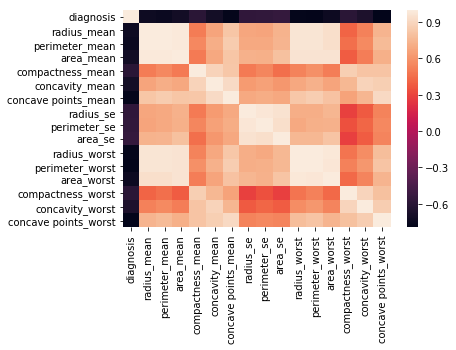

In [143]:
df_1=df.iloc[:,[1,2,4,5,7,8,9,12,14,15,22,24,25,27,28,29]]
sns.heatmap(df_1.corr())
print(df_1.corr())

f1_score_test: 0.9420289855072465
f1_score_train: 0.9658703071672355


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


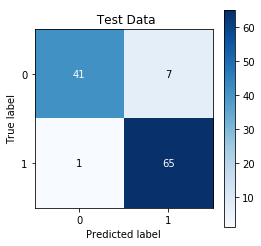

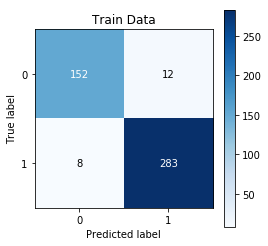

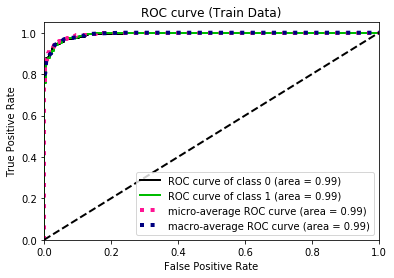

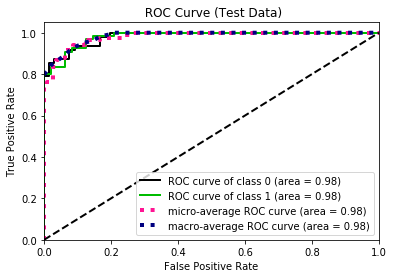

In [109]:
X=df_1
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12)
lg=LogisticRegression()
lg.fit(X_train,y_train)
y_pred_test=lg.predict(X_test)
y_pred_train=lg.predict(X_train)
y_prob_train=lg.predict_proba(X_train)
y_prob_test=lg.predict_proba(X_test)
print("f1_score_test: "+str(f1_score(y_test,y_pred_test)))
print("f1_score_train: "+str(f1_score(y_train,y_pred_train)))
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,y_pred_test,figsize=(4,4),title=" Test Data")
skplt.metrics.plot_confusion_matrix(y_train,y_pred_train,figsize=(4,4),title="Train Data")
skplt.metrics.plot_roc(y_train,y_prob_train,title="ROC curve (Train Data)")
skplt.metrics.plot_roc(y_test,y_prob_test,title=" ROC Curve (Test Data)")


In [137]:
index_M=df['diagnosis']==0
df_M=df[index_M]
index_B=df['diagnosis']==1
df_B=df[index_B]

Text(0.5,1,'Benign Mean radius')

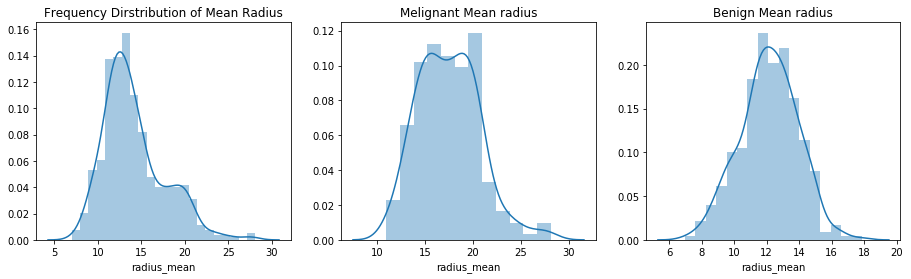

In [138]:
plt.subplots_adjust(left=13,right=15) 
plt.subplot(1,3,1)
sns.distplot(df['radius_mean'])
plt.title("Frequency Dirstribution of Mean Radius")
plt.subplot(1,3,2)
sns.distplot(df_M['radius_mean'])
plt.title("Melignant Mean radius")
plt.subplot(1,3,3)
sns.distplot(df_B['radius_mean'])
plt.title("Benign Mean radius")

Text(0.5,1,'Benign Mean Perimeter')

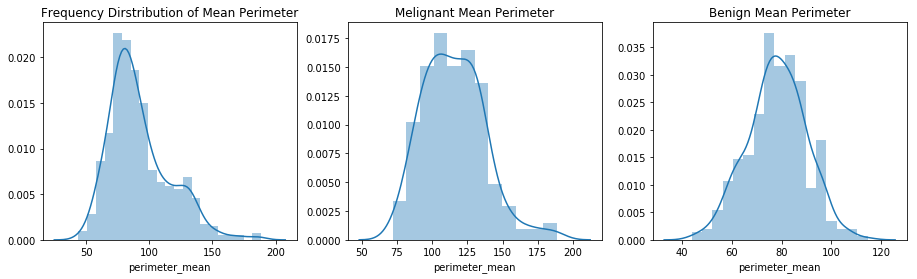

In [139]:
plt.subplots_adjust(left=13,right=15) 
plt.subplot(1,3,1)
sns.distplot(df['perimeter_mean'])
plt.title("Frequency Dirstribution of Mean Perimeter")
plt.subplot(1,3,2)
sns.distplot(df_M['perimeter_mean'])
plt.title("Melignant Mean Perimeter")
plt.subplot(1,3,3)
sns.distplot(df_B['perimeter_mean'])
plt.title("Benign Mean Perimeter")

462.7901960784314


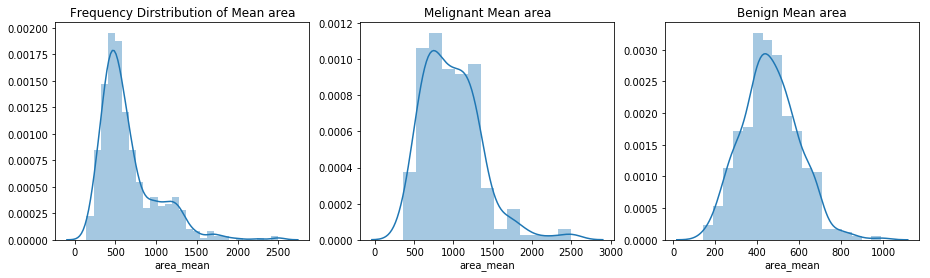

In [140]:
import statistics
plt.subplots_adjust(left=13,right=15) 
plt.subplot(1,3,1)
sns.distplot(df['area_mean'])
plt.title("Frequency Dirstribution of Mean area")
plt.subplot(1,3,2)
sns.distplot(df_M['area_mean'])
plt.title("Melignant Mean area")
plt.subplot(1,3,3)
sns.distplot(df_B['area_mean'])
plt.title("Benign Mean area")


Text(0.5,1,'Benign Mean compactness')

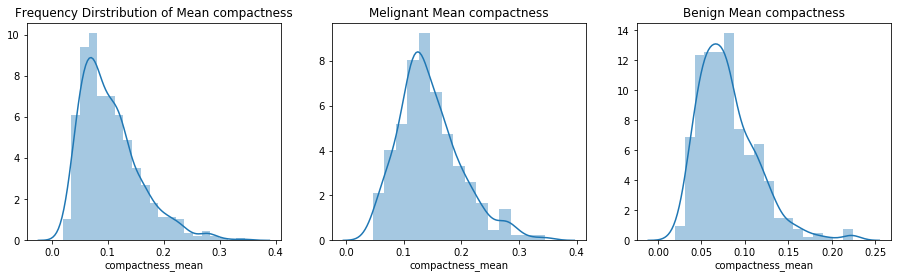

In [145]:
plt.subplots_adjust(left=13,right=15) 
plt.subplot(1,3,1)
sns.distplot(df['compactness_mean'])
plt.title("Frequency Dirstribution of Mean compactness")
plt.subplot(1,3,2)
sns.distplot(df_M['compactness_mean'])
plt.title("Melignant Mean compactness")
plt.subplot(1,3,3)
sns.distplot(df_B['compactness_mean'])
plt.title("Benign Mean compactness")


0.04605762100840336


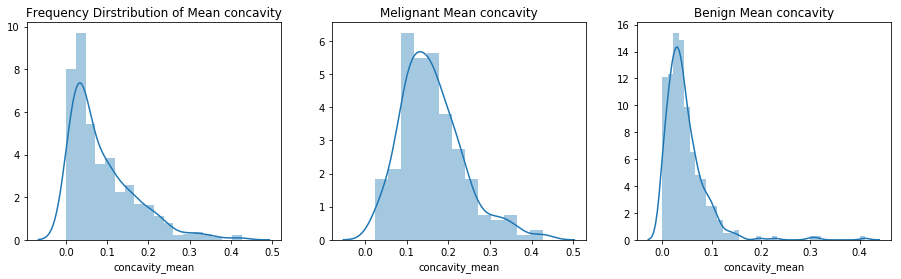

In [146]:
plt.subplots_adjust(left=13,right=15) 
plt.subplot(1,3,1)
sns.distplot(df['concavity_mean'])
plt.title("Frequency Dirstribution of Mean concavity")
plt.subplot(1,3,2)
sns.distplot(df_M['concavity_mean'])
plt.title("Melignant Mean concavity")
plt.subplot(1,3,3)
sns.distplot(df_B['concavity_mean'])
plt.title("Benign Mean concavity")


Text(0.5,1,'Benign Mean concave')

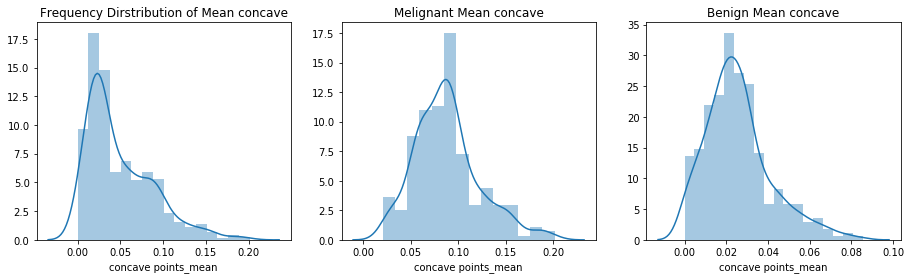

In [150]:
plt.subplots_adjust(left=13,right=15) 
plt.subplot(1,3,1)
sns.distplot(df['concave points_mean'])
plt.title("Frequency Dirstribution of Mean concave")
plt.subplot(1,3,2)
sns.distplot(df_M['concave points_mean'])
plt.title("Melignant Mean concave")
plt.subplot(1,3,3)
sns.distplot(df_B['concave points_mean'])
plt.title("Benign Mean concave")


Text(0.5,1,'Benign worst concave')

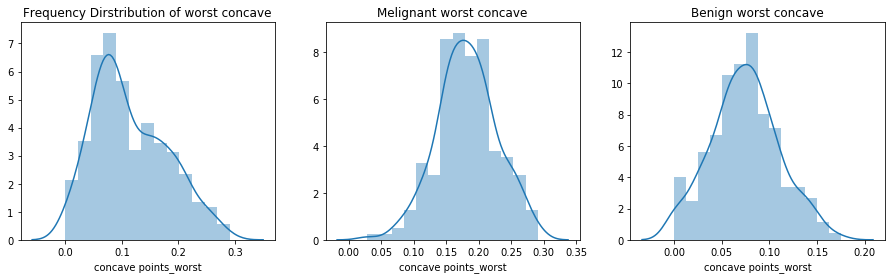

In [151]:
plt.subplots_adjust(left=13,right=15) 
plt.subplot(1,3,1)
sns.distplot(df['concave points_worst'])
plt.title("Frequency Dirstribution of worst concave")
plt.subplot(1,3,2)
sns.distplot(df_M['concave points_worst'])
plt.title("Melignant worst concave")
plt.subplot(1,3,3)
sns.distplot(df_B['concave points_worst'])
plt.title("Benign worst concave")


In [144]:
df_1.columns

Index(['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'radius_se', 'perimeter_se', 'area_se', 'radius_worst',
       'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')

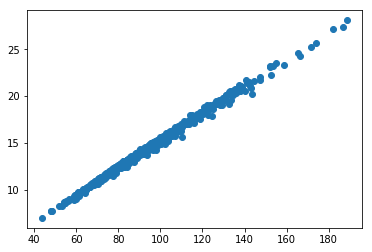

In [169]:
plt.scatter(df['perimeter_mean'],df['radius_mean'])
plt.xlabel("perimeter_mean")
plt.ylabel("radius_mean")
df['p_m+r_m']=df['perimeter_mean']+df['radius_mean']  # forming new feature

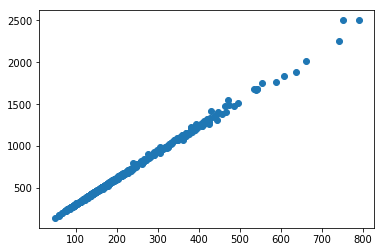

In [170]:
plt.scatter((df['radius_mean']*df['radius_mean']),(df['area_mean']))
plt.xlabel("radius_mean^2")
plt.ylabel=("area_mean")
df['r_m^2+a_m']=  (df['radius_mean']*df['radius_mean'])+df['area_mean']

Text(0.5,0,'area_mean')

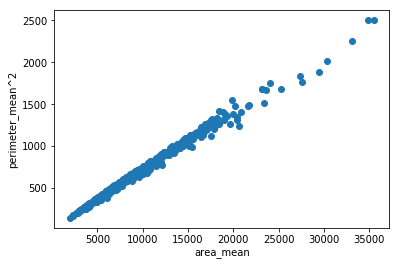

In [173]:
plt.scatter((df['perimeter_mean']*df['perimeter_mean']),df['area_mean'])
df['p_m^2+a_m']=(df['perimeter_mean']*df['perimeter_mean'])+df['area_mean']
plt.ylabel("perimeter_mean^2")
plt.xlabel("area_mean")

In [175]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32', 'p_m+r_m',
       'r_m^2+a_m', 'p_m^2+a_m'],
      dtype='object')

In [176]:
df.drop(['area_mean','perimeter_mean','radius_mean'],axis=1,inplace=True)

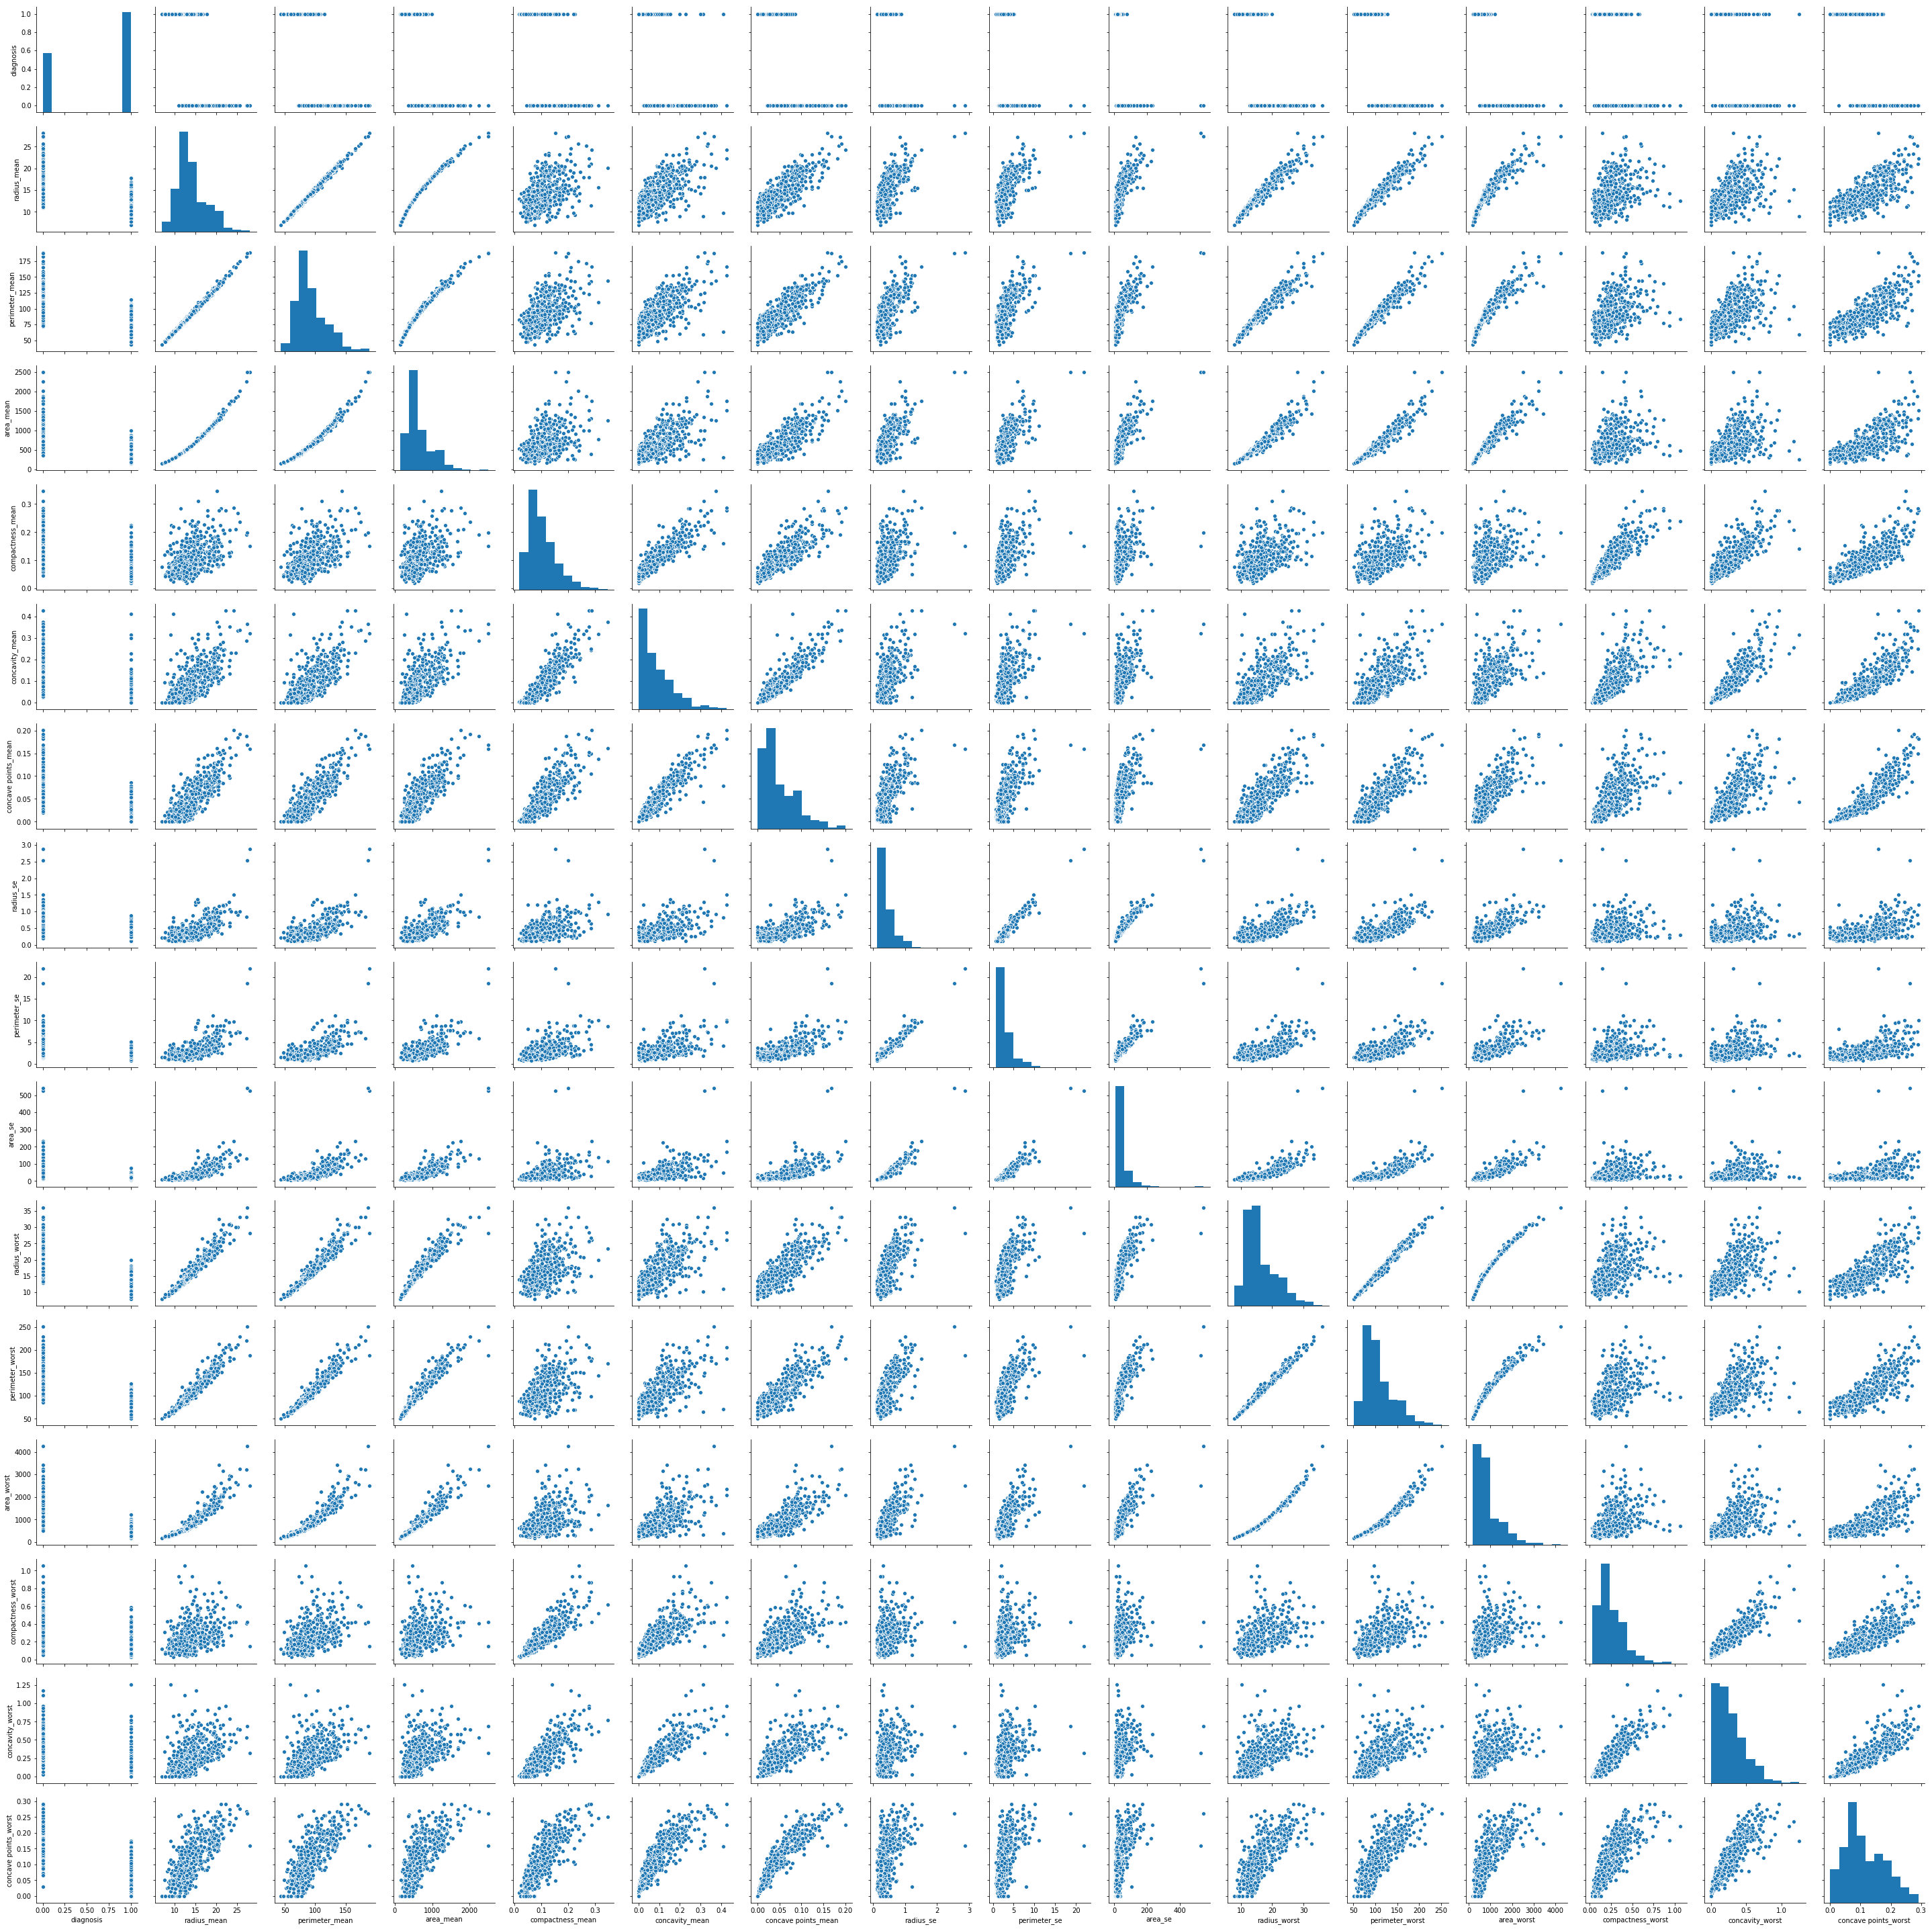

In [156]:
sns.pairplot(df_1)